In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# Data Loading and Preprocessing

In [32]:
df = pd.read_csv("survey lung cancer.csv")
df['GENDER'] = df['GENDER'].map({'M':1, 'F':2})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

In [33]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [35]:
x = np.array(df.drop('LUNG_CANCER', axis = 1))
y = np.array(df['LUNG_CANCER'])

# Model Training using Hyperparatmeter tuning

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.03, stratify=y, random_state=42)

# Define the RandomForestClassifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

# Display best parameters found
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


# Model Prediction

In [37]:
# Predict using the tuned model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

# Evaluation

In [38]:
print(f"y_pred: {y_pred}")
print(f"y_test: {y_test}")

y_pred: [1 0 1 0 1 1 1 1 1 1]
y_test: [1 1 1 0 1 1 1 1 1 1]


In [39]:
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Accuracy Score:
0.9


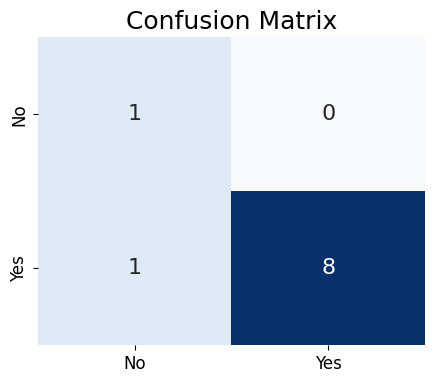

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['No', 'Yes'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['No', 'Yes'], fontsize=12)
plt.show()